<a href="https://colab.research.google.com/github/erickbautista74/Surinam_disability/blob/main/Surinam_ErickBautista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**INITIAL SET UP - PySpark**
---

In [ ]:
from google.colab import drive

In [ ]:
pwd

'/content'

In [ ]:
ls -l

total 4
drwxr-xr-x 1 root root 4096 Sep 19 13:25 sample_data/


In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=a5f7d8139740755b76cb2a2a330d07a4eb89998251ee289b624d973fbc6e5f47
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
        .master("local")\
        .appName("WBG Disability - ErickBautista")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

---
#**1. DATASET IDENTIFICATION**
---

In [ ]:
df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/Data/Surinam.csv', sep = ',', inferSchema = True, header = True)

In [ ]:
#df_bk = df

In [ ]:
#pip install ipumspy

---
#**2. EXPLORATORY DATA ANALYSIS (EDA) - PySpark**
---

In [ ]:
df.show(5)

+-------+----+---------+------+----+------+-----+---+---+--------+---------+-------+--------+------+------+------+------+-------+--------+
|COUNTRY|YEAR|   SAMPLE|SERIAL|HHWT|PERNUM|PERWT|AGE|SEX|EDATTAIN|EDATTAIND|EMPSTAT|EMPSTATD|WGCARE|WGCOGN|WGCOMM|WGHEAR|WGMOBIL|WGVISION|
+-------+----+---------+------+----+------+-----+---+---+--------+---------+-------+--------+------+------+------+------+-------+--------+
|    740|2012|740201201|  1000|10.0|     1| 10.0| 59|  1|       2|      221|      1|     100|     1|     1|     1|     1|      1|       1|
|    740|2012|740201201|  1000|10.0|     2| 10.0| 58|  2|       2|      212|      3|     310|     1|     1|     1|     1|      1|       1|
|    740|2012|740201201|  1000|10.0|     3| 10.0| 32|  1|       3|      321|      1|     100|     1|     1|     1|     1|      1|       1|
|    740|2012|740201201|  1000|10.0|     4| 10.0| 53|  1|       2|      212|      1|     100|     1|     1|     1|     1|      1|       1|
|    740|2012|740201201|  1

In [ ]:
df = df[['COUNTRY','YEAR','PERWT','AGE','SEX','EDATTAIN','EMPSTAT','WGCARE','WGCOGN','WGCOMM','WGHEAR','WGMOBIL','WGVISION']]

In [ ]:
df.columns

['COUNTRY',
 'YEAR',
 'PERWT',
 'AGE',
 'SEX',
 'EDATTAIN',
 'EMPSTAT',
 'WGCARE',
 'WGCOGN',
 'WGCOMM',
 'WGHEAR',
 'WGMOBIL',
 'WGVISION']

In [ ]:
df.printSchema()

root
 |-- COUNTRY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- PERWT: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDATTAIN: integer (nullable = true)
 |-- EMPSTAT: integer (nullable = true)
 |-- WGCARE: integer (nullable = true)
 |-- WGCOGN: integer (nullable = true)
 |-- WGCOMM: integer (nullable = true)
 |-- WGHEAR: integer (nullable = true)
 |-- WGMOBIL: integer (nullable = true)
 |-- WGVISION: integer (nullable = true)



In [ ]:
# Data type conversion
df = df.withColumn("WGCARE",df['WGCARE'].cast("Integer"))\
       .withColumn("WGCOGN",df['WGCOGN'].cast("Integer"))\
       .withColumn("WGCOMM",df['WGCOMM'].cast("Integer"))\
       .withColumn("WGHEAR",df['WGHEAR'].cast("Integer"))\
       .withColumn("WGMOBIL",df['WGMOBIL'].cast("Integer"))\
       .withColumn("WGVISION",df['WGVISION'].cast("Integer"))\
       .withColumn("EMPSTAT",df['EMPSTAT'].cast("Integer"))\
       .withColumn("URBAN",df['URBAN'].cast("Integer"))

In [ ]:
df.printSchema()

root
 |-- COUNTRY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- PERWT: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDATTAIN: integer (nullable = true)
 |-- EMPSTAT: integer (nullable = true)
 |-- WGCARE: integer (nullable = true)
 |-- WGCOGN: integer (nullable = true)
 |-- WGCOMM: integer (nullable = true)
 |-- WGHEAR: integer (nullable = true)
 |-- WGMOBIL: integer (nullable = true)
 |-- WGVISION: integer (nullable = true)



In [ ]:
# Number of rows
df.count()

53636

In [ ]:
# Number of columns
len(df.columns)

13

In [ ]:
df.describe().show()

+-------+-------+------+-----+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|COUNTRY|  YEAR|PERWT|              AGE|               SEX|          EDATTAIN|          EMPSTAT|            WGCARE|            WGCOGN|            WGCOMM|            WGHEAR|           WGMOBIL|          WGVISION|
+-------+-------+------+-----+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|  53636| 53636|53636|            53636|             53636|             53636|            53636|             53636|             53636|             53636|             53636|             53636|             53636|
|   mean|  740.0|2012.0| 10.0|35.92167574017451|1.5011372958460736| 2.505350883734805|1.204172570661496|1.4166045193526735|1

---
#**3. DATA PRE-PROCESSING - PySpark**
---

###Clean Data - delete missing - 3% of 101MM ==> 3MM


In [ ]:
# Clean NULL values, just for show the method
df = df.na.drop(subset=['COUNTRY', 'YEAR', 'AGE', 'SEX', 'EDATTAIN', 'EMPSTAT'])

In [ ]:
df.show(5)

+-------+----+-----+---+---+--------+-------+------+------+------+------+-------+--------+
|COUNTRY|YEAR|PERWT|AGE|SEX|EDATTAIN|EMPSTAT|WGCARE|WGCOGN|WGCOMM|WGHEAR|WGMOBIL|WGVISION|
+-------+----+-----+---+---+--------+-------+------+------+------+------+-------+--------+
|    740|2012| 10.0| 59|  1|       2|      1|     1|     1|     1|     1|      1|       1|
|    740|2012| 10.0| 58|  2|       2|      3|     1|     1|     1|     1|      1|       1|
|    740|2012| 10.0| 32|  1|       3|      1|     1|     1|     1|     1|      1|       1|
|    740|2012| 10.0| 53|  1|       2|      1|     1|     1|     1|     1|      1|       1|
|    740|2012| 10.0| 34|  2|       2|      3|     1|     1|     1|     1|      1|       1|
+-------+----+-----+---+---+--------+-------+------+------+------+------+-------+--------+
only showing top 5 rows



In [ ]:
df.count()

53636

##**3.1 Clean Data - Choose variables/columns**


##**3.7 Data Description Columns**

In [ ]:
#    Group.1 Group.2        x             Group.1
# 1       76    2000 20274412              Brazil
# 4       76    2010 20635472              Brazil
# 13     104    2014  5032818             Myanmar
# 5      360    2010 23603049           Indonesia
# 6      480    2011   126332           Mauritius
# 14     504    2014  3341426             Morocco
# 12     686    2013  1245551             Senegal
# 3      704    2009 14177590             Vietnam
# 16     710    2016  3328793        South Africa
# 9      716    2012   654688            Zimbabwe
# 10     740    2012    53636            Suriname
# 7      780    2011   116917 Trinidad and Tobago
# 15     800    2014  3506546              Uganda
# 11     834    2012  4498022            Tanzania
# 8      858    2011   328425             Uruguay
# 2      894    2000   996117              Zambia

---
#**4. DATA STORAGE - PySpark --> Google Drive**
---

In [ ]:
# Only 1 partition to save in 1 file
df = df.coalesce(1)

In [ ]:
df.write.csv('/content/drive/MyDrive/Colab Notebooks/Data/Surinam_sample.csv', header=True, mode='overwrite')

In [ ]:
df = spark.read.csv('/content/drive/MyDrive/Colab Notebooks/Data/Surinam_sample.csv/', sep = ',', inferSchema = True, header = True)

In [ ]:
del df

In [ ]:
df.printSchema()

root
 |-- COUNTRY: integer (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- PERWT: double (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDATTAIN: integer (nullable = true)
 |-- EMPSTAT: integer (nullable = true)
 |-- WGCARE: integer (nullable = true)
 |-- WGCOGN: integer (nullable = true)
 |-- WGCOMM: integer (nullable = true)
 |-- WGHEAR: integer (nullable = true)
 |-- WGMOBIL: integer (nullable = true)
 |-- WGVISION: integer (nullable = true)



In [ ]:
df.count()

53636

---
#**5. DATA PROCESSING - PySpark**
### **Linear Regression Analysis**
---

In [ ]:
from pyspark import SparkFiles
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [ ]:
assembler = VectorAssembler(
    inputCols=['COUNTRY','URBAN','AGE','SEX','EDATTAIN','EMPSTAT'],
    outputCol="features")

In [ ]:
assembler

VectorAssembler_ccc6dc74fbc1

In [ ]:
data_set = assembler.transform(df)

In [ ]:
data_set['COUNTRY','URBAN','AGE','SEX','EDATTAIN','EMPSTAT'].show(3)

+-------+-----+---+---+--------+-------+
|COUNTRY|URBAN|AGE|SEX|EDATTAIN|EMPSTAT|
+-------+-----+---+---+--------+-------+
|     76|    2| 25|  2|       4|      3|
|     76|    2| 20|  1|       3|      1|
|     76|    2| 49|  2|       1|      3|
+-------+-----+---+---+--------+-------+
only showing top 3 rows



In [ ]:
final_data = data_set.select("features",'WGVISION')

In [ ]:
final_data.show(3)

+--------------------+--------+
|            features|WGVISION|
+--------------------+--------+
|[76.0,2.0,25.0,2....|       1|
|[76.0,2.0,20.0,1....|       1|
|[76.0,2.0,49.0,2....|       3|
+--------------------+--------+
only showing top 3 rows



In [ ]:
train_data, test_data = final_data.randomSplit([0.8, 0.2], seed=42)

In [ ]:
train_data.show(3)

+--------------------+--------+
|            features|WGVISION|
+--------------------+--------+
|[76.0,1.0,0.0,1.0...|       1|
|[76.0,1.0,0.0,1.0...|       1|
|[76.0,1.0,0.0,1.0...|       1|
+--------------------+--------+
only showing top 3 rows



In [ ]:
test_data.show(3)

+--------------------+--------+
|            features|WGVISION|
+--------------------+--------+
|[76.0,1.0,0.0,1.0...|       1|
|[76.0,1.0,0.0,1.0...|       1|
|[76.0,1.0,0.0,2.0...|       1|
+--------------------+--------+
only showing top 3 rows



In [ ]:
lr = LinearRegression(featuresCol="features", labelCol="WGVISION", predictionCol="predicted_WGVISION")

In [ ]:
lr_model = lr.fit(train_data)

In [ ]:
predictions = lr_model.transform(test_data)

In [ ]:
trainingSummary = lr_model.summary

In [ ]:
test_stats = lr_model.evaluate(test_data)

RMSE is expressed in the same units as the dependent variable and provides a measure of the typical magnitude of the errors made by the model. A lower RMSE indicates better model performance, as it means the model's predictions are closer to the actual values.

R2 Score R2 ranges between 0 and 1. A value of 1 indicates that the model perfectly predicts the dependent variable, while a value of 0 indicates that the model does not explain any variability in the dependent variable.

Mean Square Error(MSE) - is average of square of the errors. The larger the number the larger the error. Error refers to difference between observed values y1, y2, y3 and corresponding predicted values - pred(y1), pred(y2), pred(y3). Differences are squared, so that negative and positive values do not cancel each other out

In [ ]:
# Check accuracy of linear regression model
print(f"RMSE: {test_stats.rootMeanSquaredError}")
print(f"R2: {test_stats.r2}")
print(f"MSE: {test_stats.meanSquaredError}")

RMSE: 1.0360767517086809
R2: 0.06655022810002753
MSE: 1.0734550354312116


In [ ]:
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print("Coefficients: ", coefficients)
print("Intercept: {:.3f}".format(intercept))

Coefficients:  [0.00045364714474357314,0.03033257990425278,0.0009313271366489453,0.016925215165303903,-0.23832889912239885,-0.07856524449457697]
Intercept: 1.482


## **6.1 Dataset Identification - Pandas**

---
#**6. PANDAS**
---

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **6.1 Dataset Identification - Pandas**

In [ ]:
# Convert PySpark Dataframe to Pandas dataframe
pandas_df = df.toPandas()

## **6.2 Exploratory Data Analysis (EDA) - Pandas**

In [ ]:
# Rows and Columns
pandas_df.shape

(9810, 14)

In [ ]:
# Data Structure
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9810 entries, 0 to 9809
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   COUNTRY   9810 non-null   int32  
 1   YEAR      9810 non-null   int32  
 2   URBAN     9810 non-null   int32  
 3   PERWT     9810 non-null   float64
 4   AGE       9810 non-null   int32  
 5   SEX       9810 non-null   int32  
 6   EDATTAIN  9810 non-null   int32  
 7   EMPSTAT   9810 non-null   int32  
 8   WGCARE    3282 non-null   float64
 9   WGCOGN    5554 non-null   float64
 10  WGCOMM    472 non-null    float64
 11  WGHEAR    9810 non-null   int32  
 12  WGMOBIL   9645 non-null   float64
 13  WGVISION  9810 non-null   int32  
dtypes: float64(5), int32(9)
memory usage: 728.2 KB


In [ ]:
# Statistics of Pandas Dataframe
pandas_df.describe()

,COUNTRY,YEAR,URBAN,PERWT,AGE,SEX,EDATTAIN,EMPSTAT,WGCARE,WGCOGN,WGCOMM,WGHEAR,WGMOBIL,WGVISION
count,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,3282.000000,5554.000000,472.000000,9810.000000,9645.000000,9810.000000
mean,332.667278,2008.316208,1.583792,8.973849,28.731498,1.498165,1.597554,1.507951,1.048751,1.270436,1.139831,1.180938,1.200622,1.232314
std,276.442580,4.610545,0.707044,3.921028,20.064217,0.500022,0.939670,1.144111,0.504838,1.384994,0.982621,1.078518,1.103086,1.094456
min,76.000000,2000.000000,1.000000,0.550000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,76.000000,2009.000000,1.000000,6.642500,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,360.000000,2010.000000,2.000000,10.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,686.000000,2010.000000,2.000000,10.000000,42.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,894.000000,2014.000000,9.000000,67.300000,100.000000,2.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [ ]:
# Preview top 3 rows
pandas_df.head(3)

,COUNTRY,YEAR,URBAN,PERWT,AGE,SEX,EDATTAIN,EMPSTAT,WGCARE,WGCOGN,WGCOMM,WGHEAR,WGMOBIL,WGVISION
0,76,2000,2,8.72,25,2,4,3,NaN,NaN,NaN,1,1.0,1
1,76,2000,2,11.21,20,1,3,1,NaN,NaN,NaN,1,1.0,1
2,76,2000,2,8.45,49,2,1,3,NaN,NaN,NaN,3,3.0,3


In [ ]:
# Preview bottom 3 rows
pandas_df.tail(3)

,COUNTRY,YEAR,URBAN,PERWT,AGE,SEX,EDATTAIN,EMPSTAT,WGCARE,WGCOGN,WGCOMM,WGHEAR,WGMOBIL,WGVISION
9807,894,2000,1,10.0,2,1,0,0,NaN,NaN,NaN,1,NaN,1
9808,894,2000,1,10.0,27,2,2,3,NaN,NaN,NaN,1,NaN,1
9809,894,2000,1,10.0,20,1,2,2,NaN,NaN,NaN,1,NaN,1


In [ ]:
# Checking Null values
pandas_df.isnull().sum()*100/pandas_df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

COUNTRY      0.000000
YEAR         0.000000
URBAN        0.000000
PERWT        0.000000
AGE          0.000000
SEX          0.000000
EDATTAIN     0.000000
EMPSTAT      0.000000
WGCARE      66.544343
WGCOGN      43.384302
WGCOMM      95.188583
WGHEAR       0.000000
WGMOBIL      1.681957
WGVISION     0.000000
dtype: float64

## **6.3 Data Pre-Processing - Pandas**

In [ ]:
# Pre-processing is not needed because the dataset was cleaned with spark

## **6.4 Data set Readiness - Pandas**

### Using Seaborn Visualization (pairplot)
To find CORRELATION among columns with respect to square_feet.

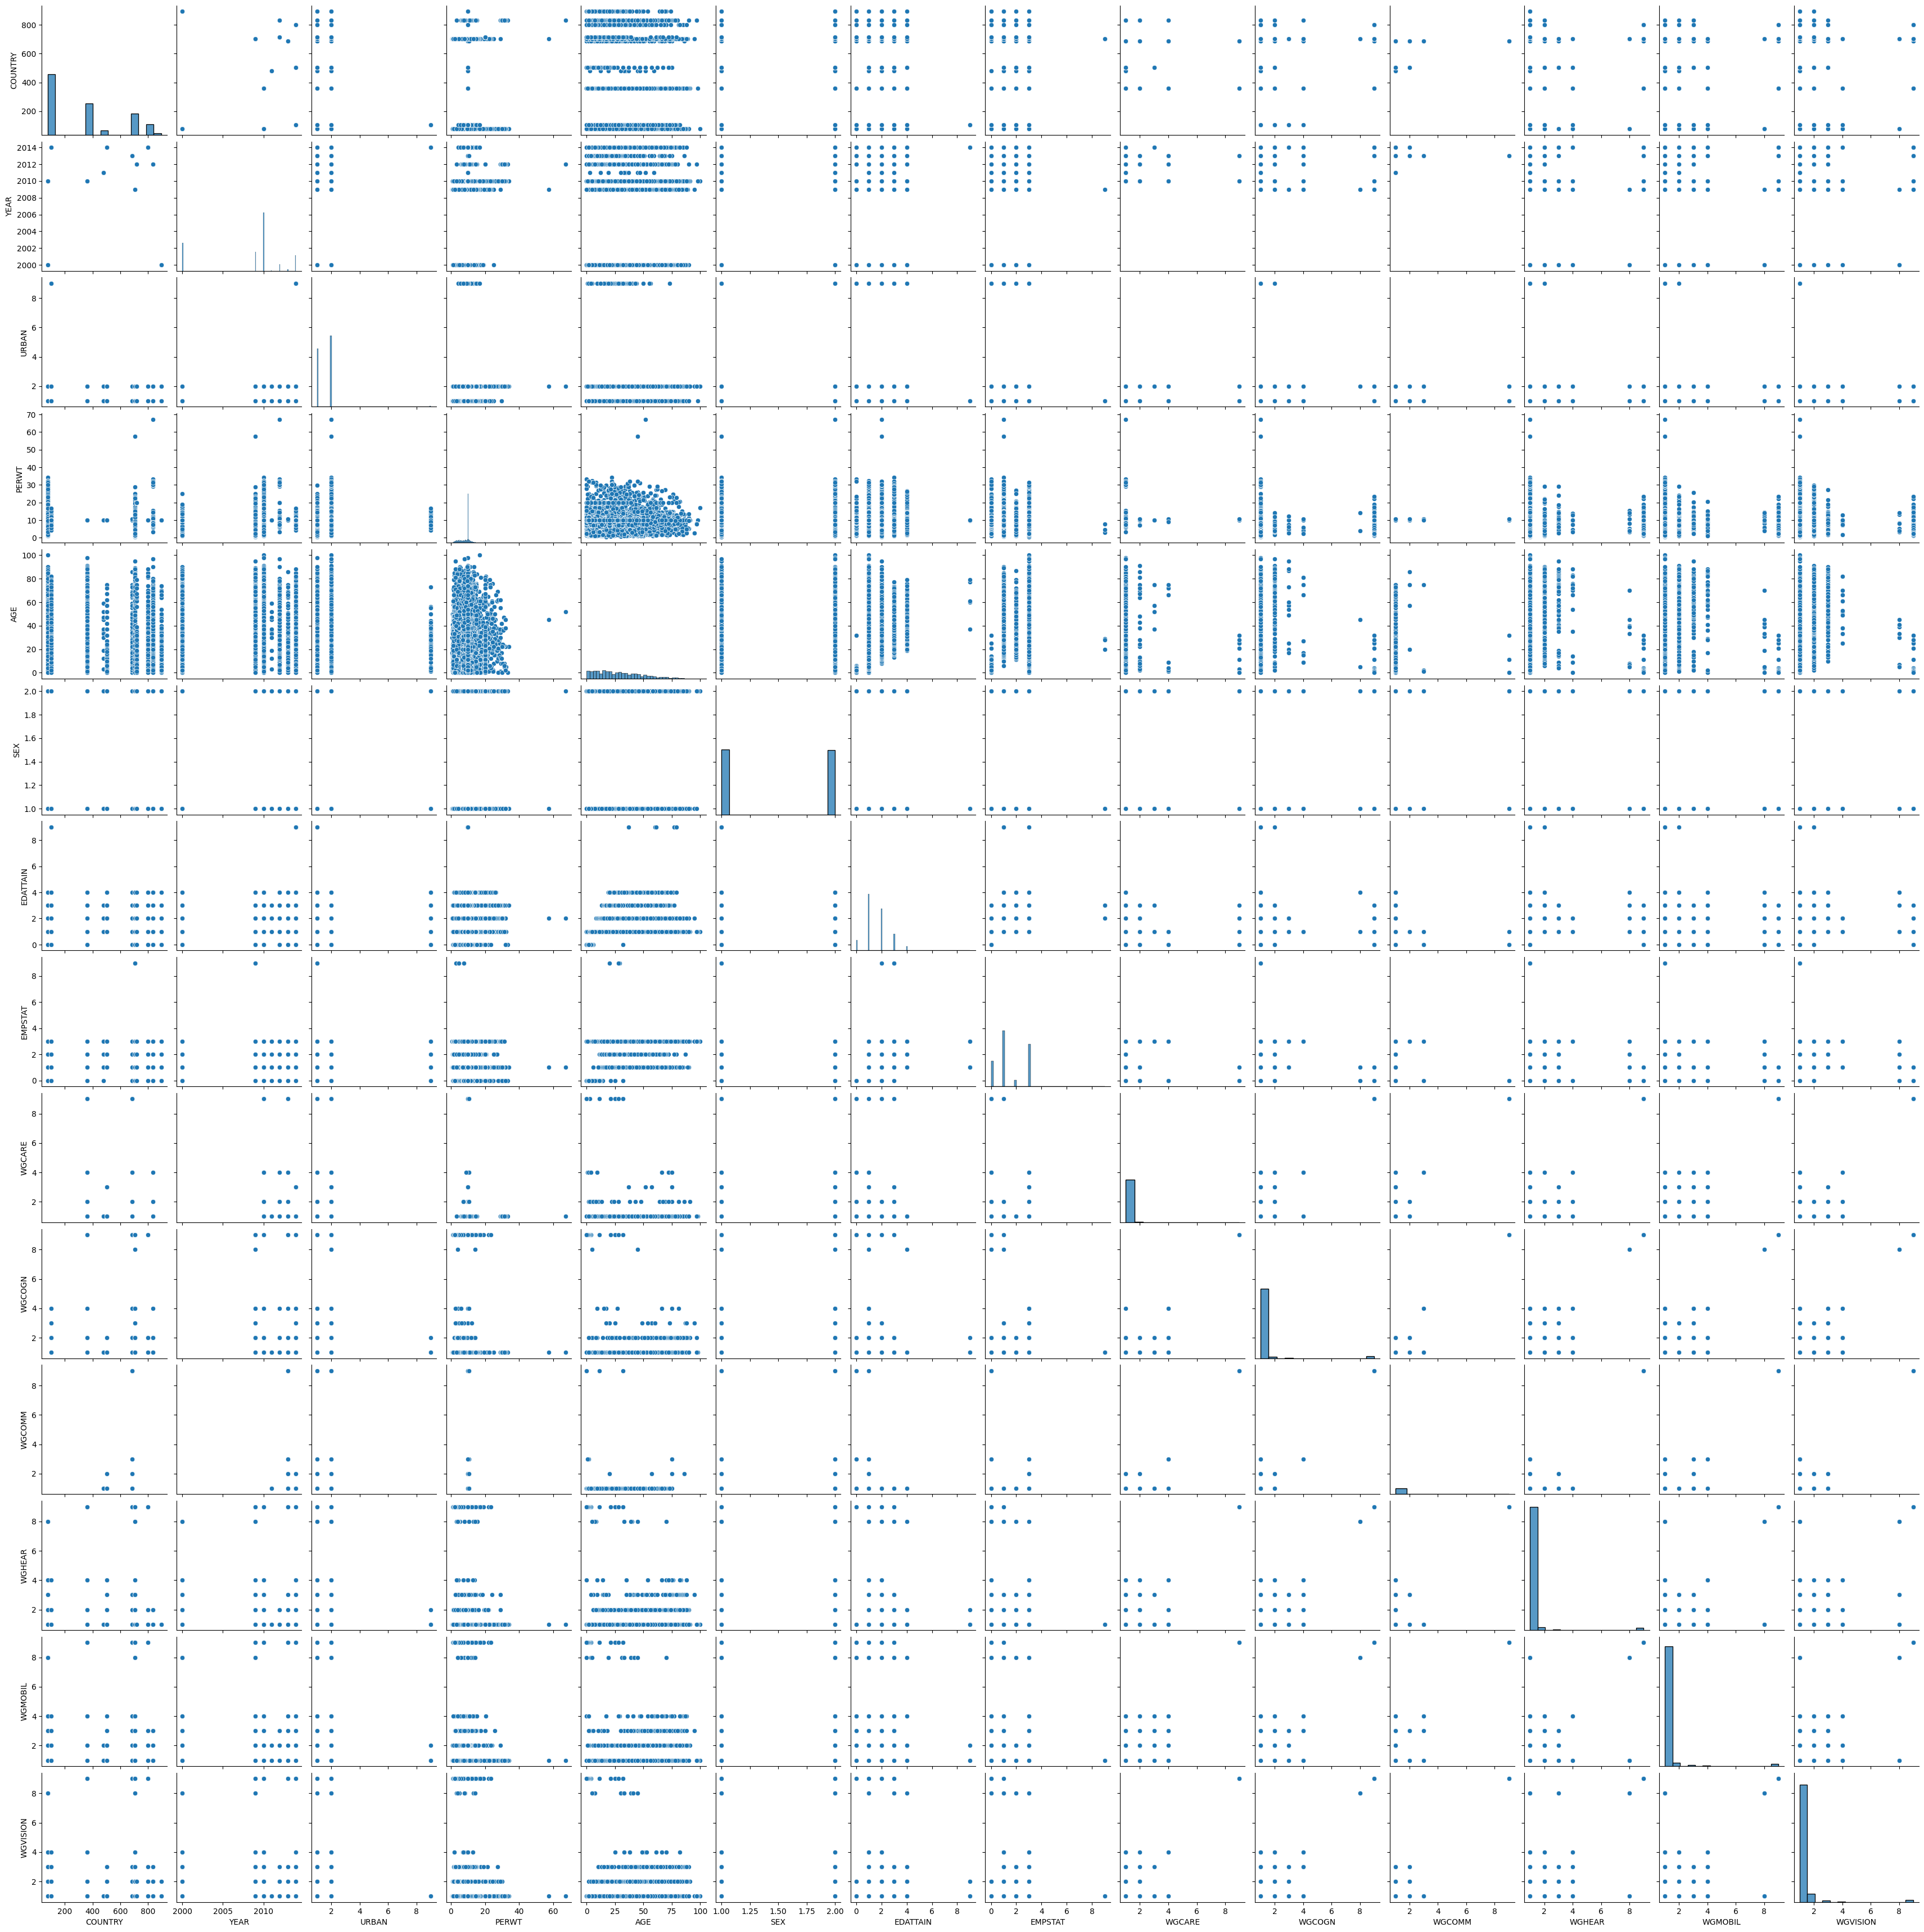

In [ ]:
sns.pairplot(pandas_df);

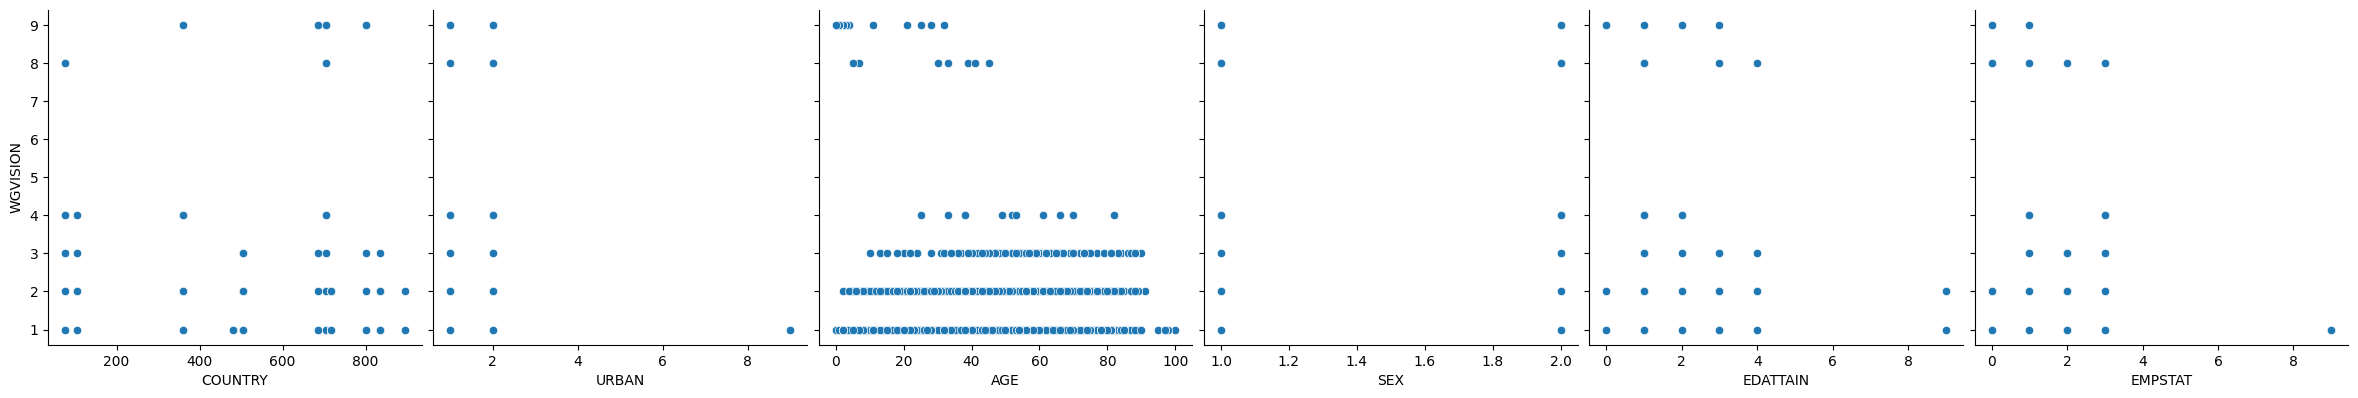

In [ ]:
# Let's see how  are related with other variables using scatter plot.
sns.pairplot(pandas_df, x_vars=['COUNTRY','URBAN','AGE','SEX','EDATTAIN','EMPSTAT'], y_vars='WGVISION', height=4, aspect=1, kind='scatter')
plt.show()

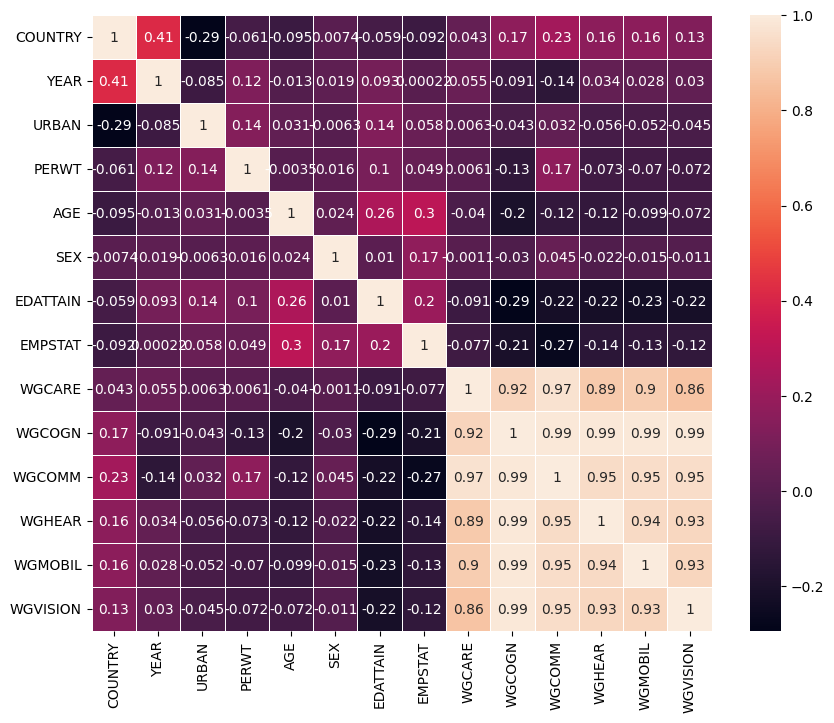

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pandas_df.corr(),linewidth=0.5, annot=True);

### Correlation
- Correlation coefficient, or simply correlation, is an index that ranges from -1 to 1.
- When value is near zero, there is no linear relationship.
- As correlation gets closer to plus or minus one, relationship is stronger.
- A value of one (or negative one) indicates a perfect linear relationship between two variables.

In [ ]:
pandas_df.corr().WGVISION.sort_values(ascending=False)

WGVISION    1.000000
WGCOGN      0.985895
WGCOMM      0.951203
WGHEAR      0.932823
WGMOBIL     0.926724
WGCARE      0.864449
COUNTRY     0.127782
YEAR        0.030292
SEX        -0.011050
URBAN      -0.044722
PERWT      -0.071617
AGE        -0.072034
EMPSTAT    -0.123884
EDATTAIN   -0.218662
Name: WGVISION, dtype: float64

### Histogram
- A great way to get started exploring a single variable is with the histogram.
- A histogram divides variable into bins, counts the data points in each bin.
- It shows bins on x-axis and counts on the y-axis.

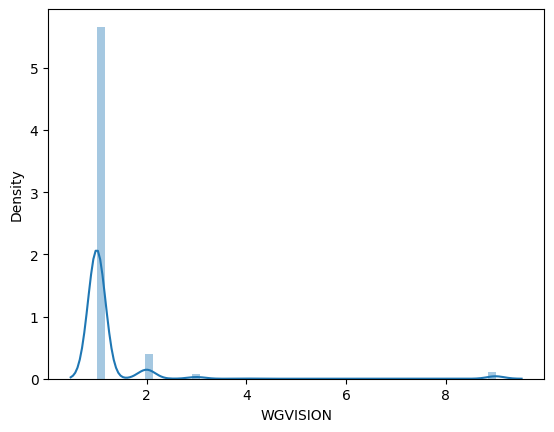

In [ ]:
sns.distplot(pandas_df.WGVISION);

## **6.5 Machine Learning - Build Model - Pandas**

### **6.5.1 Predicting using bathrooms and bedrooms**

In [ ]:
# Independent variable(x) - 'bathrooms' 'bedrooms'
X = pandas_df[['COUNTRY','URBAN','AGE','SEX','EDATTAIN','EMPSTAT']]

# Dependent variables(y) - 'square_feet'
y = pandas_df['WGVISION']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

,COUNTRY,URBAN,AGE,SEX,EDATTAIN,EMPSTAT
9221,800,1,29,1,2,1
7836,704,1,36,1,2,1
2378,76,2,40,1,2,1
5186,360,2,31,1,3,1
8075,704,1,10,2,1,0


In [ ]:
y_train.head()

9221    1
7836    1
2378    1
5186    1
8075    1
Name: WGVISION, dtype: int32

In [ ]:
# Creating a Linear Regression Model
lm = LinearRegression()

# Training the Model created using the 70% data assigned for training
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Find y intercept(c)and slope(m) values as below:

#To retrieve the y intercept (c):
print("Intercept : ",lm.intercept_)

#To retrieve the slope (m):
print(lm.coef_)

print("Coeffs - 'COUNTRY','URBAN','AGE','SEX','EDATTAIN','EMPSTAT'", lm.coef_[0])

Intercept :  1.421514979162829
[ 0.00044553  0.02902723  0.00085286  0.05434449 -0.23194814 -0.07909185]
Coeffs - 'COUNTRY','URBAN','AGE','SEX','EDATTAIN','EMPSTAT' 0.00044552590122108333


In [ ]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predicted values')

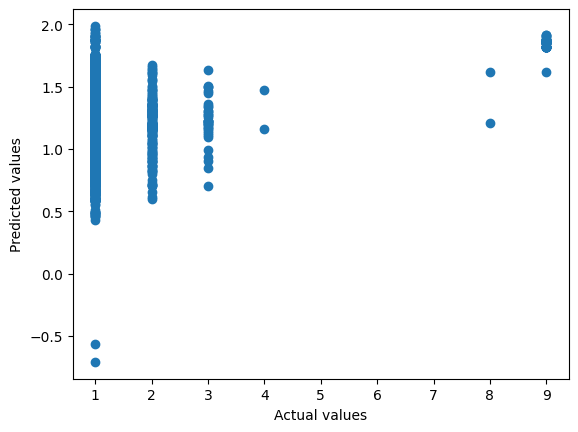

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [ ]:
vari = metrics.explained_variance_score(y_test,y_pred)
r2score = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('Variance: ',vari)
print('R2 score : ', r2score)
print('MSE: ',mse )

Variance:  0.07043259432176119
R2 score :  0.0704301652799123
MSE:  1.1031312351678484


In [ ]:
spark.stop()